In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_tabla(url):
    # Realizar la solicitud GET al sitio web
    response = requests.get(url)
    
    # Verificar que la solicitud sea exitosa (código 200)
    if response.status_code == 200:
        # Parsear el contenido HTML con BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Buscar la tabla en el HTML (ajusta este selector según la estructura de la tabla)
        tabla = soup.find('table')
        
        # Verificar que se encontró la tabla
        if tabla:
            # Inicializar una lista para almacenar los datos de la tabla
            datos_tabla = []
            
            # Recorrer cada fila de la tabla
            for fila in tabla.find_all('tr'):
                # Inicializar una lista para almacenar los datos de cada fila
                datos_fila = []
                
                # Recorrer cada celda de la fila
                for celda in fila.find_all(['td', 'th']):
                    # Agregar el contenido de la celda a la lista de datos de la fila
                    datos_fila.append(celda.text.strip())
                
                # Agregar la lista de datos de la fila a la lista general de datos de la tabla
                datos_tabla.append(datos_fila)
            
            return datos_tabla
        else:
            print("No se encontró la tabla en el sitio web.")
            return None
    else:
        print("Error al obtener el contenido del sitio web. Código de estado:", response.status_code)
        return None

# URL del sitio web con la tabla que deseas extraer
url = 'https://www.nicerx.com/fast-food-capitals/'

# Llamar a la función para obtener los datos de la tabla
datos_tabla = scrape_tabla(url)

if datos_tabla:
    # Convertir la lista de listas en un DataFrame de pandas
    df = pd.DataFrame(datos_tabla[1:], columns=datos_tabla[0])  # Se asume que la primera lista en datos_tabla contiene los nombres de las columnas
    
    # Imprimir el DataFrame resultante




In [3]:
df.head()

,State,All fast food restaurants,Full-service restaurants,Subway,Starbucks,McDonalds,Dunkin Donut,Burger King,Taco Bell,Dominos,Wendys,Dairy Queen,KFC
0,Hawaii,97.5,89.9,7.0,6.4,5.2,0.8,2.0,2.1,1.6,0.7,0.5,1.1
1,New York,92.3,106.1,4.5,3.3,3.1,7.6,1.8,1.0,1.2,1.1,0.2,0.8
2,Maryland,89.7,59.0,6.8,4.6,4.7,4.7,2.0,1.5,2.0,1.6,0.5,1.1
3,Nevada,84.8,68.4,6.1,8.2,4.6,0.9,2.1,2.6,1.8,1.4,1.2,1.3
4,Ohio,82.8,65.2,8.9,3.8,5.2,1.9,2.9,3.2,2.2,3.5,2.2,1.7


In [5]:
#guardar en csv
df.to_csv('scrappigfastfoodporestado.csv')


In [103]:
#guardar en excel
df.to_excel('scrappigfastfoodporestado.xlsx')

In [147]:
dfgdppoblac=pd.read_excel('/Users/florencialuppi/Desktop/DS/Proyecto Final DS/GDPpopulation22states.xlsx')

In [129]:
dfgdppoblac.head()

,Estados,Real GDP 2022,poblacion2022,PersonalIncome2022,min_wage22,Average Rent,Average Taxes,All fast food restaurants
0,Alabama,213265,5074296,256949,$7.25,1.218,"9,334",81.7
1,Alaska,49634,733583,50558,$10.34,1.313,"11,826",61.9
2,Arizona,356417,7359197,417021,$12.80,1.608,"11,214",67.9
3,Arkansas,126532,3045637,157725,$11.00,987.000,"9,413",69.9
4,California,2885627,39029342,3018471,$15.00,2.506,"16,895",82.3


In [148]:
#transformar average taxes a entero
dfgdppoblac['Average Taxes']=dfgdppoblac['Average Taxes'].str.replace(',', '').astype(int)


In [149]:
#transformar min_wage22  a float
dfgdppoblac['min_wage22'] = dfgdppoblac['min_wage22'].str.replace('$', '')
dfgdppoblac['min_wage22'] = dfgdppoblac['min_wage22'].astype(float)

In [150]:
#scoring y ponderacion 

import pandas as pd

# Supongamos que tienes un DataFrame llamado dfgdppoblac con las columnas mencionadas, incluyendo "Average Taxes"

# Invertir los valores de min_wage, Average Rent y Average Taxes para que valores menores sean mejores
dfgdppoblac['min_wage22_invertido'] = 1 / dfgdppoblac['min_wage22']
dfgdppoblac['Rent_invertido'] = 1 / dfgdppoblac['Average Rent']
dfgdppoblac['Taxes_invertido'] = 1 / dfgdppoblac['Average Taxes']
dfgdppoblac['All fast food restaurants']= 1 / dfgdppoblac['All fast food restaurants']

# Normalizar las columnas GDP, poblacion y PersonalIncome
dfgdppoblac['GDP_Normalizado'] = dfgdppoblac['Real GDP 2022'] / dfgdppoblac['Real GDP 2022'].max()
dfgdppoblac['Poblacion_Normalizada'] = dfgdppoblac['poblacion2022'] / dfgdppoblac['poblacion2022'].max()
dfgdppoblac['Income_Normalizado'] = dfgdppoblac['PersonalIncome2022'] / dfgdppoblac['PersonalIncome2022'].max()

# Calcular el valor ponderado de cada columna, considerando que mayor GDP y poblacion es mejor
dfgdppoblac['GDP_Ponderado'] = dfgdppoblac['GDP_Normalizado'] * 10
dfgdppoblac['Poblacion_Ponderado'] = dfgdppoblac['Poblacion_Normalizada'] * 15
dfgdppoblac['Income_Ponderado'] = dfgdppoblac['Income_Normalizado'] * 5

# Normalizar y ponderar la columna min_wage con el valor invertido
dfgdppoblac['Wage_Normalizado'] = dfgdppoblac['min_wage22_invertido'] / dfgdppoblac['min_wage22_invertido'].max()
dfgdppoblac['Wage_Ponderado'] = dfgdppoblac['Wage_Normalizado'] * 20

# Normalizar y ponderar la columna Average Rent con el valor invertido
dfgdppoblac['Rent_Normalizado'] = dfgdppoblac['Rent_invertido'] / dfgdppoblac['Rent_invertido'].max()
dfgdppoblac['Rent_Ponderado'] = dfgdppoblac['Rent_Normalizado'] * 15

# Normalizar y ponderar la columna Average Taxes con el valor invertido
dfgdppoblac['Taxes_Normalizado'] = dfgdppoblac['Taxes_invertido'] / dfgdppoblac['Taxes_invertido'].max()
dfgdppoblac['Taxes_Ponderado'] = dfgdppoblac['Taxes_Normalizado'] * 15

# Normalizar y ponderar la columna All fast food restaurants con el valor invertido
dfgdppoblac['All fast food restaurants_Normalizado'] = dfgdppoblac['All fast food restaurants'] / dfgdppoblac['All fast food restaurants'].max()
dfgdppoblac['All fast food restaurants_Ponderado'] = dfgdppoblac['All fast food restaurants_Normalizado'] * 20

# Calcular la columna de scoring sumando los valores ponderados de cada categoría
dfgdppoblac['Scoring'] = (
    dfgdppoblac['GDP_Ponderado'] + dfgdppoblac['Poblacion_Ponderado'] + dfgdppoblac['Income_Ponderado'] +
    dfgdppoblac['Wage_Ponderado'] + dfgdppoblac['Rent_Ponderado'] + dfgdppoblac['Taxes_Ponderado'] + dfgdppoblac['All fast food restaurants_Ponderado']
)

# Eliminar las columnas intermedias que ya no son necesarias
dfgdppoblac.drop(columns=['GDP_Normalizado', 'Poblacion_Normalizada', 'Income_Normalizado', 'min_wage22_invertido', 'Rent_invertido', 'Taxes_invertido',
                          'GDP_Ponderado', 'Poblacion_Ponderado', 'Income_Ponderado',
                          'Wage_Normalizado', 'Wage_Ponderado', 'Rent_Normalizado', 'Rent_Ponderado', 'Taxes_Normalizado', 'Taxes_Ponderado', 'All fast food restaurants_Normalizado', 'All fast food restaurants_Ponderado'],
                 inplace=True)

# Imprimir el DataFrame con la columna de scoring
print(dfgdppoblac)




                  Estados  Real GDP 2022  poblacion2022  PersonalIncome2022  \
0                Alabama          213265        5074296              256949   
1                 Alaska           49634         733583               50558   
2                Arizona          356417        7359197              417021   
3                Arkansas         126532        3045637              157725   
4             California         2885627       39029342             3018471   
5               Colorado          385835        5839926              433128   
6             Connecticut         252533        3626205              308126   
7               Delaware           65755        1018396               62516   
8   District of Columbia          129268         671803               64982   
9                Florida         1070930       22244823             1414698   
10               Georgia          591257       10912876              623447   
11                Hawaii           75418        1440

In [151]:
#ordenar por scoring mayor
dfgdppoblac.sort_values(by=['Scoring'], inplace=True, ascending=False)


In [153]:
#top 10 scoring mas alto
dfgdppoblac.head(10)


,Estados,Real GDP 2022,poblacion2022,PersonalIncome2022,min_wage22,Average Rent,Average Taxes,All fast food restaurants,Scoring
43,Texas,1876328,30029572,1861396,7.25,1.444,13225,0.013193,76.708420
4,California,2885627,39029342,3018471,15.00,2.506,16895,0.012151,67.607667
14,Indiana,352956,6833037,395839,7.25,1.194,9615,0.013569,66.034997
17,Kentucky,201375,4512310,235132,7.25,1.175,8829,0.013477,65.514839
15,Iowa,177090,3200517,188526,7.25,1.136,9903,0.014771,65.473366
24,Mississippi,104535,2940057,135972,7.25,1.233,7712,0.012937,65.032229
34,North Dakota,53125,779261,51575,7.25,1.011,11396,0.015244,64.591906
41,South Dakota,49809,909824,59872,7.25,1.084,11073,0.015649,64.432364
18,Louisiana,217156,4590241,250728,7.25,1.173,9509,0.013123,64.272441
33,North Carolina,559510,10698973,614297,7.25,1.517,10567,0.013004,64.111236


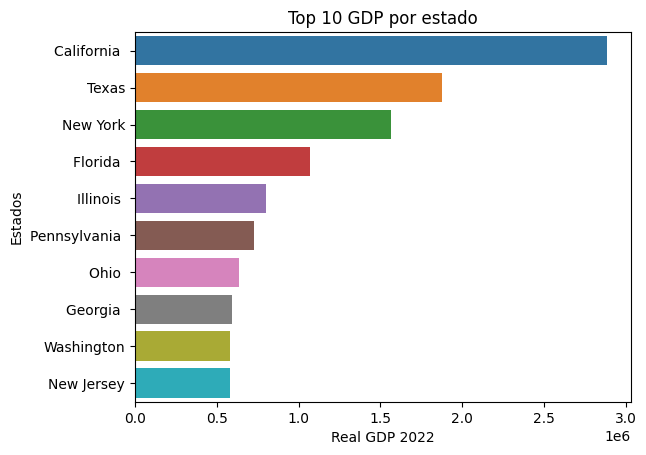

In [154]:
#graficar top 10 estados con gdp mas alto
import matplotlib.pyplot as plt
import seaborn as sns
dfgdppoblac.sort_values(by=['Real GDP 2022'], inplace=True, ascending=False)
dfgdppoblac.head(10)
sns.barplot(x='Real GDP 2022', y='Estados', data=dfgdppoblac.head(10))
plt.title('Top 10 GDP por estado')
plt.xlabel('Real GDP 2022')
plt.ylabel('Estados')
plt.show()


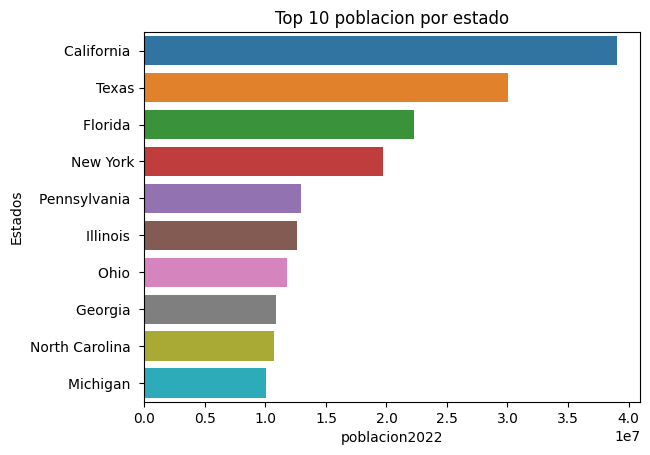

In [155]:
#graficar top 10 estados con poblacion mas alta
dfgdppoblac.sort_values(by=['poblacion2022'], inplace=True, ascending=False)
dfgdppoblac.head(10)
sns.barplot(x='poblacion2022', y='Estados', data=dfgdppoblac.head(10))
plt.title('Top 10 poblacion por estado')
plt.xlabel('poblacion2022')
plt.ylabel('Estados')
plt.show()


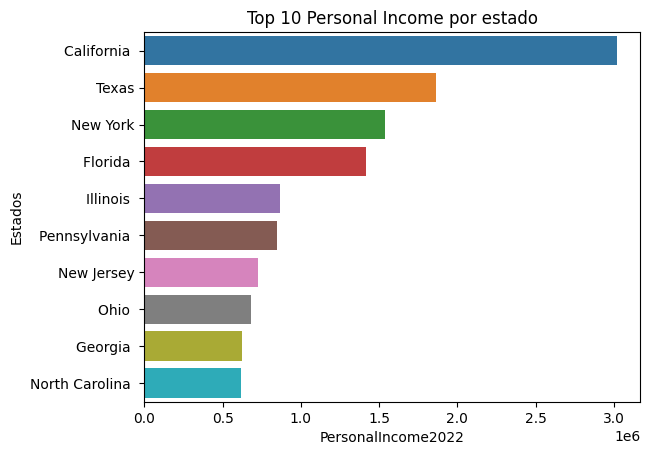

In [156]:
#graficar top 10 estados con personal income mas alto
dfgdppoblac.sort_values(by=['PersonalIncome2022'], inplace=True, ascending=False)
dfgdppoblac.head(10)
sns.barplot(x='PersonalIncome2022', y='Estados', data=dfgdppoblac.head(10))
plt.title('Top 10 Personal Income por estado')
plt.xlabel('PersonalIncome2022')
plt.ylabel('Estados')
plt.show()

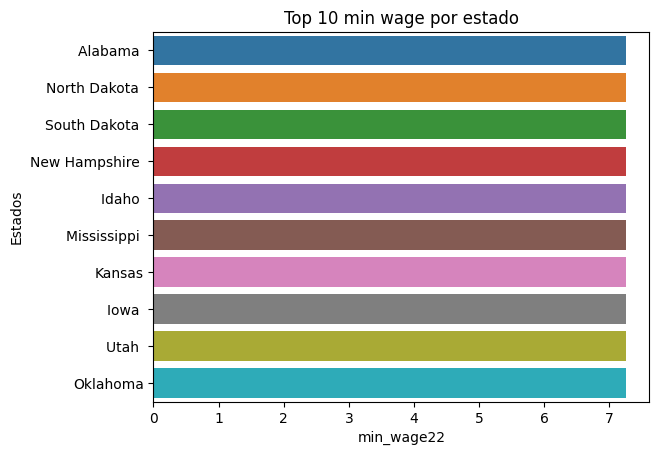

In [157]:
#graficar top 10 estados con min wage mas bajo
dfgdppoblac.sort_values(by=['min_wage22'], inplace=True, ascending=True)
dfgdppoblac.head(10)
sns.barplot(x='min_wage22', y='Estados', data=dfgdppoblac.head(10))
plt.title('Top 10 min wage por estado')
plt.xlabel('min_wage22')
plt.ylabel('Estados')
plt.show()

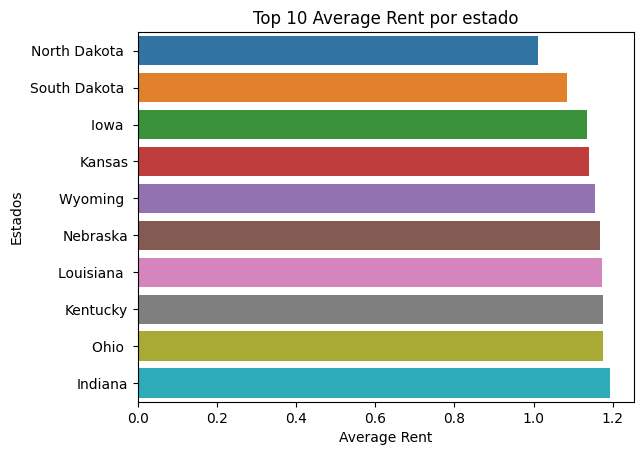

In [158]:
#graficar top 10 estados con rent mas bajo
dfgdppoblac.sort_values(by=['Average Rent'], inplace=True, ascending=True)
dfgdppoblac.head(10)
sns.barplot(x='Average Rent', y='Estados', data=dfgdppoblac.head(10))
plt.title('Top 10 Average Rent por estado')
plt.xlabel('Average Rent')
plt.ylabel('Estados')
plt.show()


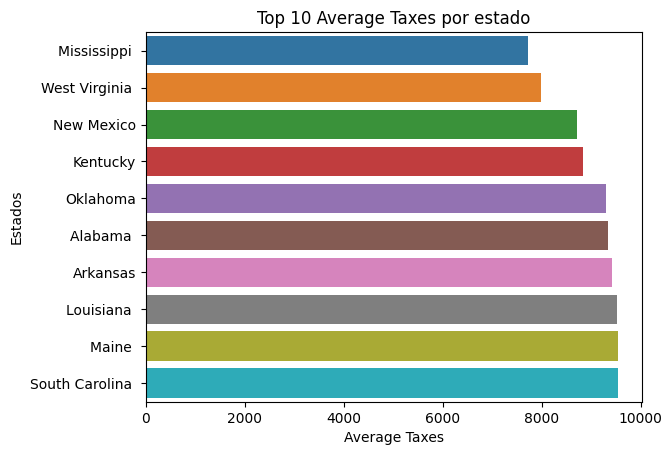

In [159]:
#graficar top 10 estados con taxes mas bajo
dfgdppoblac.sort_values(by=['Average Taxes'], inplace=True, ascending=True)
dfgdppoblac.head(10)
sns.barplot(x='Average Taxes', y='Estados', data=dfgdppoblac.head(10))
plt.title('Top 10 Average Taxes por estado')
plt.xlabel('Average Taxes')
plt.ylabel('Estados')
plt.show()